In [187]:
import pandas as pd
df = pd.read_csv('../input/ghadim/Data_Train (4).csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [188]:
df.shape

(10683, 11)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [190]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [191]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [192]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

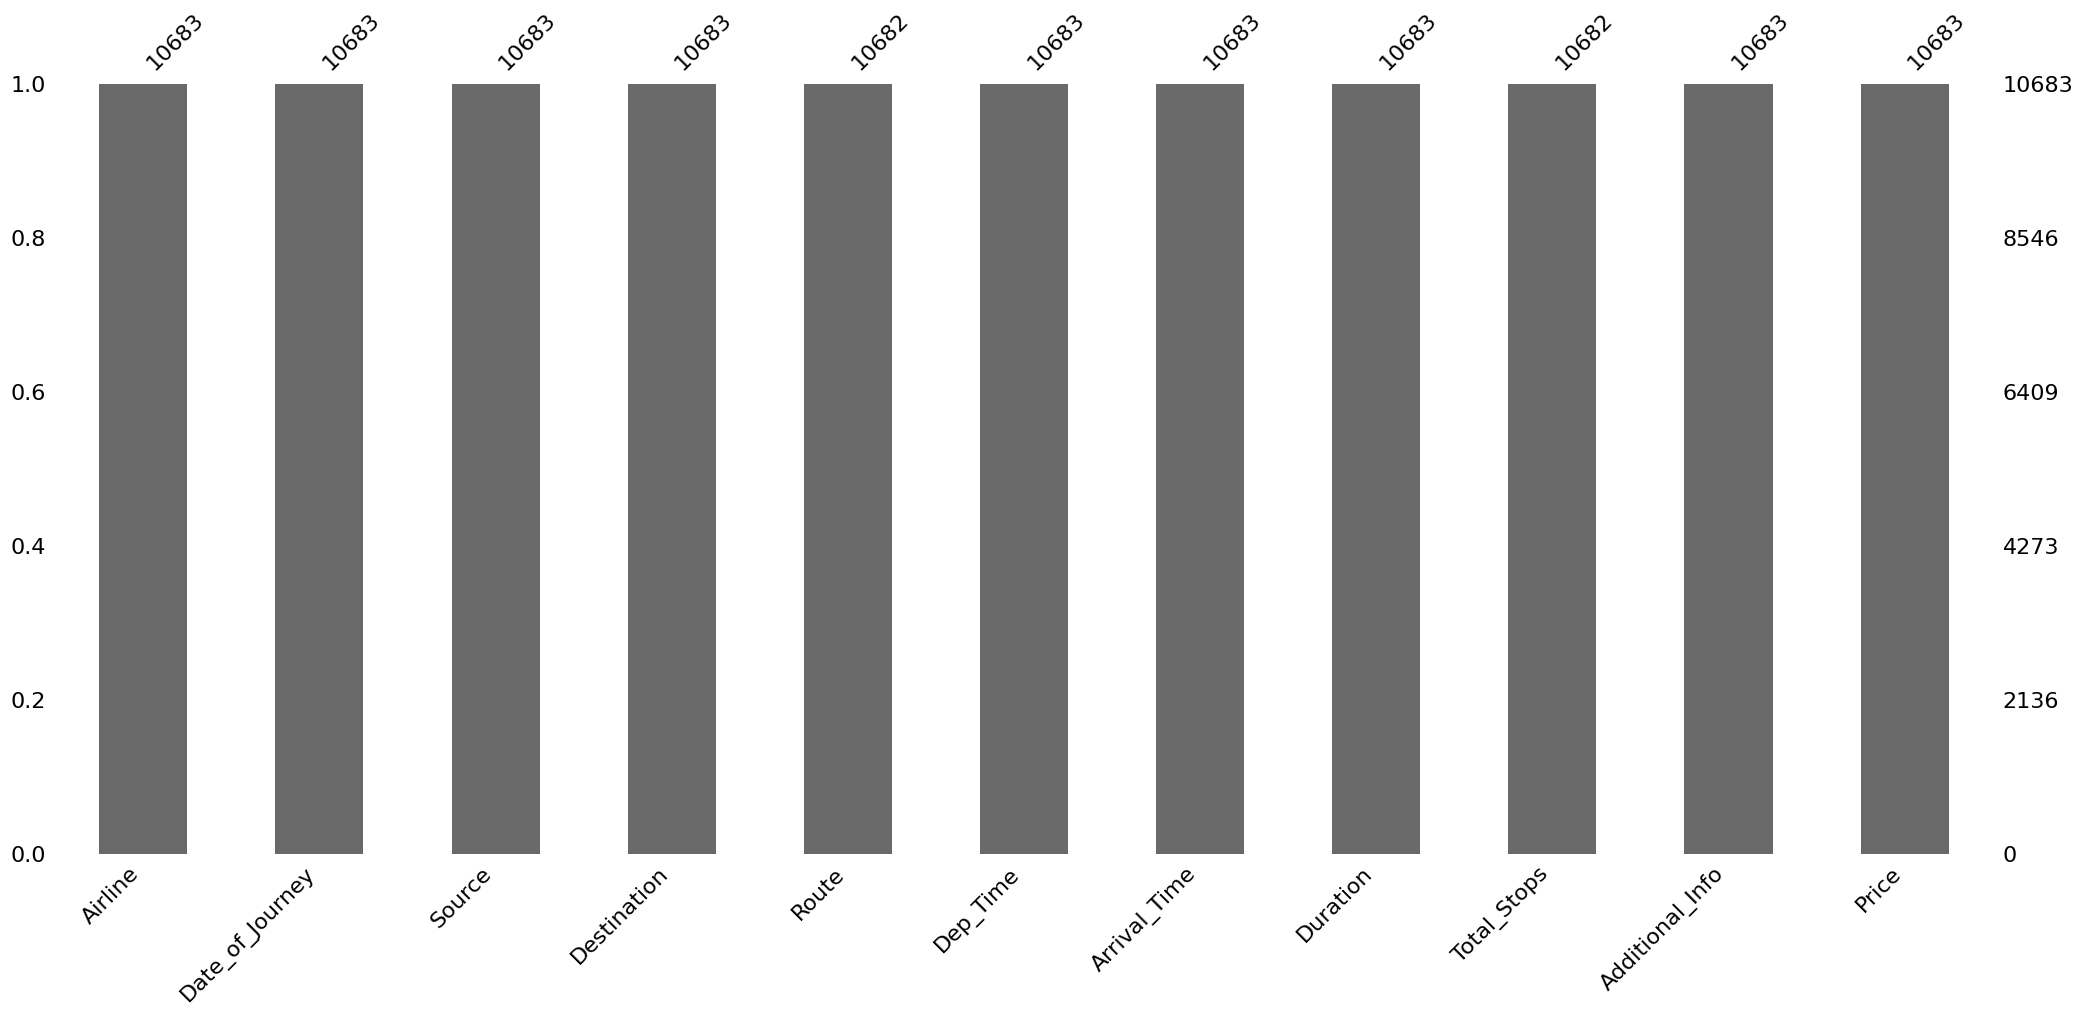

In [193]:
import missingno as msno
msno.bar(df)
plt.show

In [194]:
df.dropna(inplace=True)

In [195]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

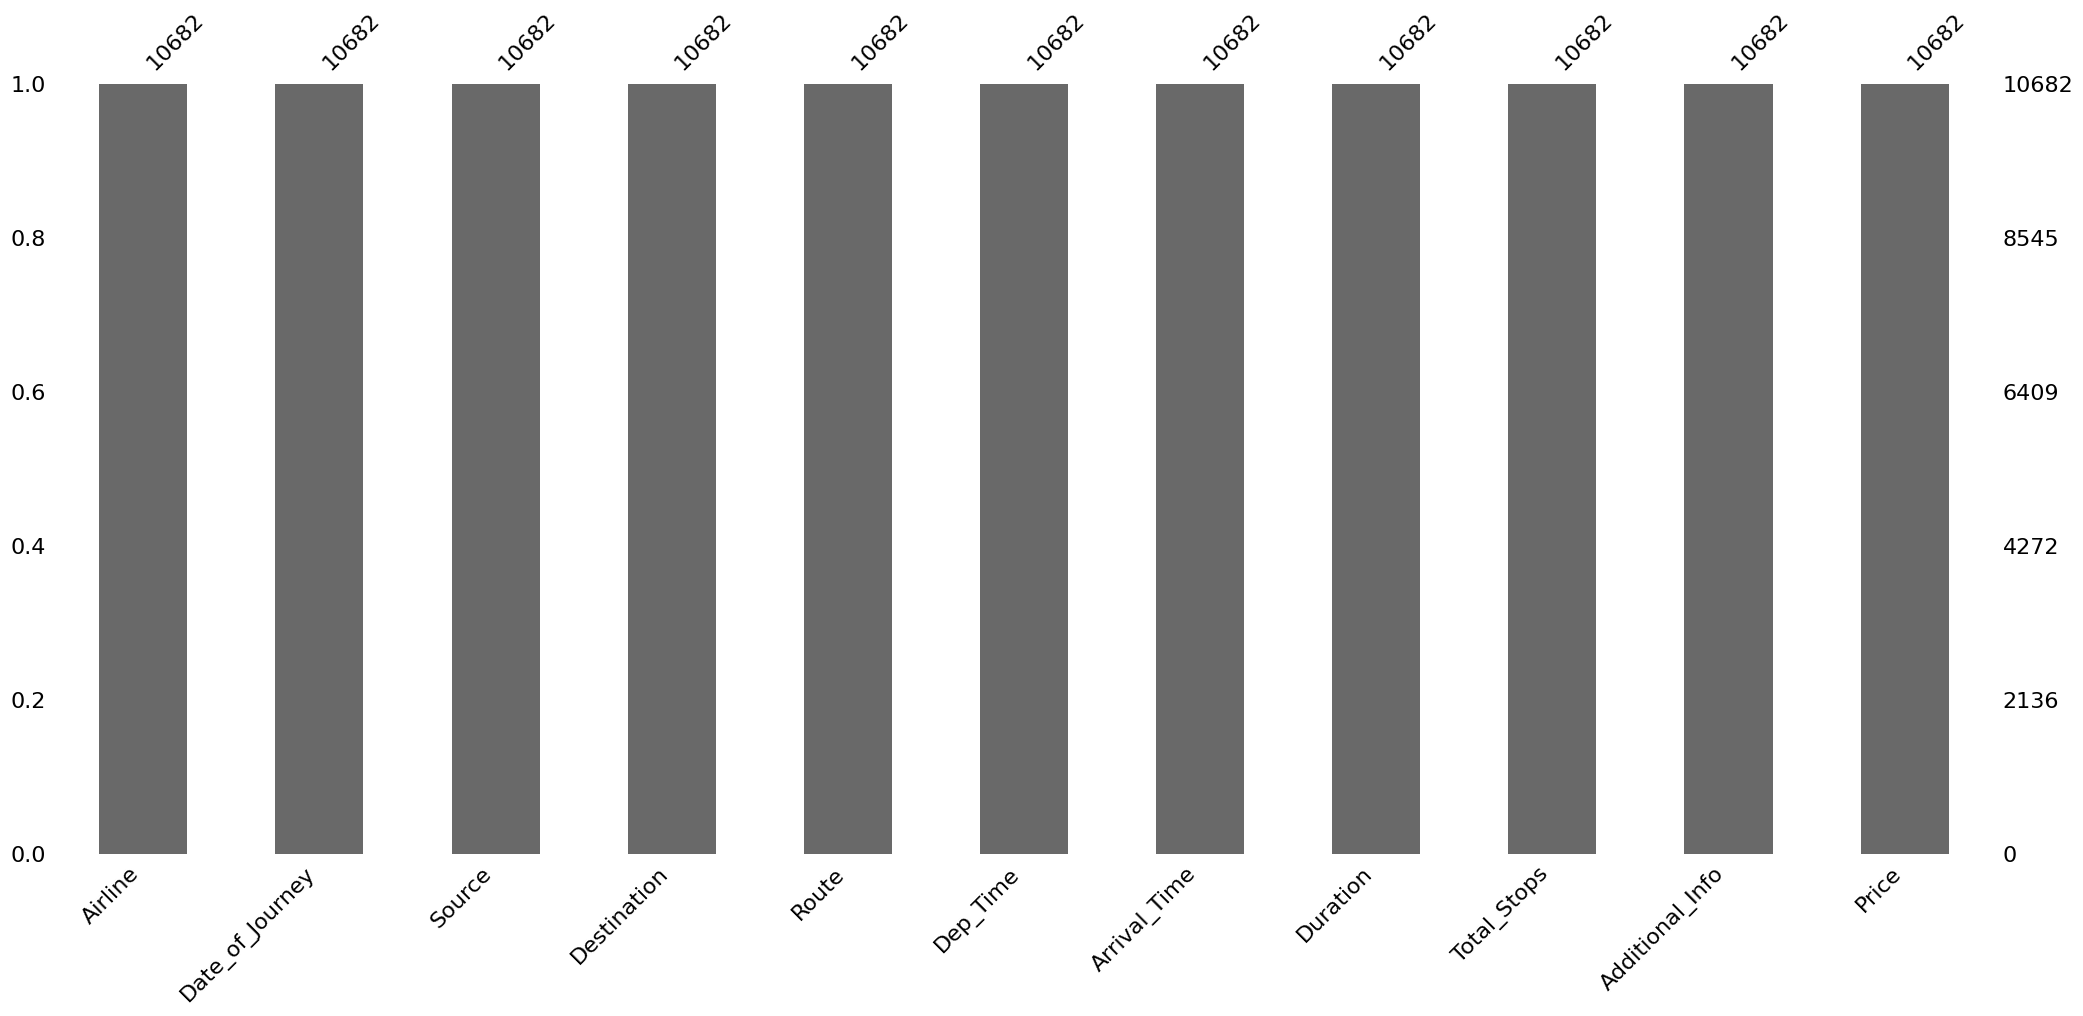

In [196]:
msno.bar(df)
plt.show

In [197]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [198]:
# data cleaning
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [199]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [200]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [201]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [202]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [203]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [204]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-29 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-29 05:50:00,2023-12-29 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-29 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-12-29 18:05:00,2023-12-29 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-12-29 16:50:00,2023-12-29 21:35:00,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2023-12-29 09:00:00,2023-12-29 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2023-12-29 18:55:00,2023-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,2023-12-29 08:00:00,2023-03-02 05:05:00,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2023-12-29 08:55:00,2023-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2023-12-29 11:25:00,2023-12-29 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [205]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [206]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-12-29 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-29 05:50:00,2023-12-29 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-29 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-12-29 18:05:00,2023-12-29 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-12-29 16:50:00,2023-12-29 21:35:00,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2023-12-29 09:00:00,2023-12-29 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-12-29 18:55:00,2023-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-12-29 08:00:00,2023-03-02 05:05:00,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-12-29 08:55:00,2023-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2023-12-29 11:25:00,2023-12-29 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [207]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [208]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [209]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [210]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [211]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [212]:
df['Duration']=duration

In [213]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [214]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [215]:
df['dur_hour']=df['Duration'].apply(hour)

In [216]:
df['dur_min']=df['Duration'].apply(minutes)

In [217]:
df.head(10)



,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7,50


<Axes: xlabel='Airline', ylabel='Price'>

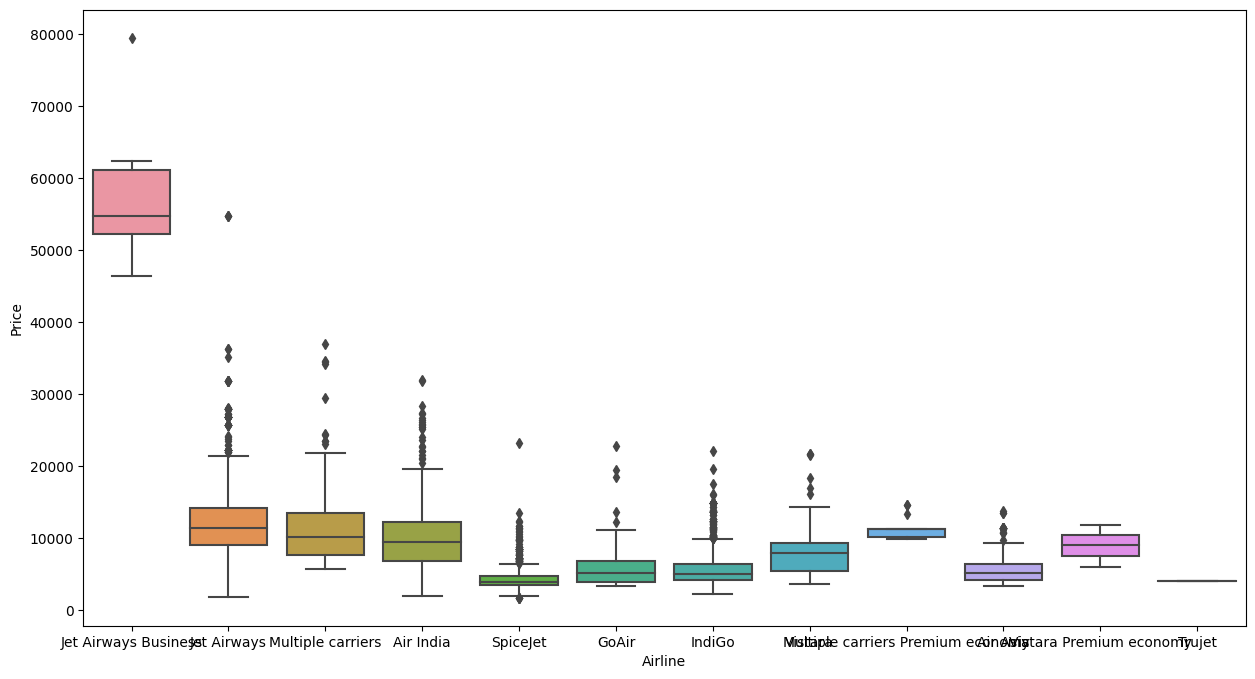

In [218]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Destination', ylabel='Price'>

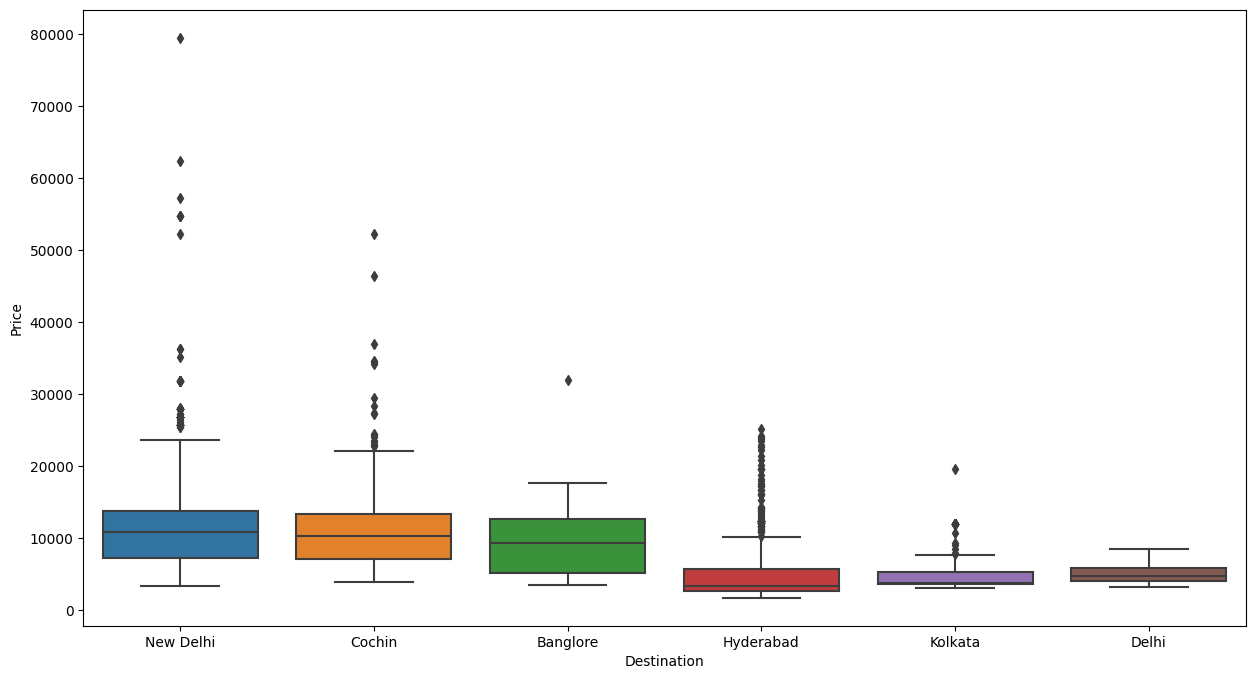

In [219]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='journey_day', ylabel='Price'>

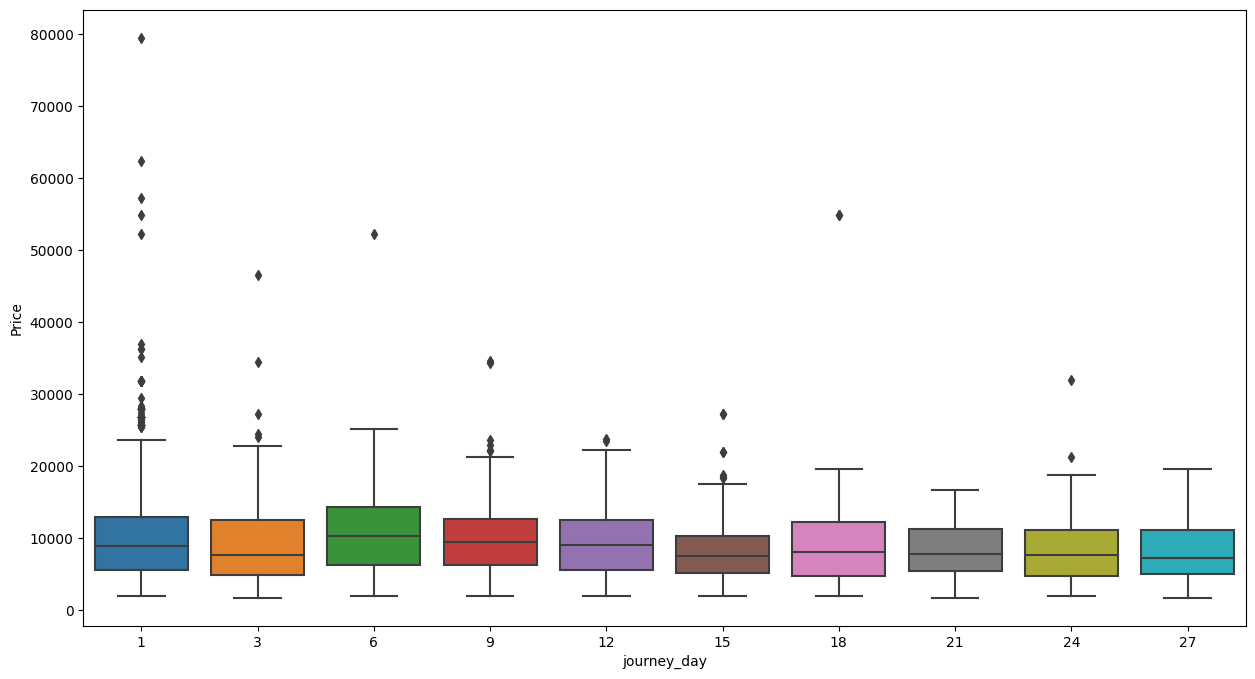

In [220]:
plt.figure(figsize=(15,8))
sns.boxplot(x='journey_day',y='Price',data=df.sort_values('Price',ascending=False))

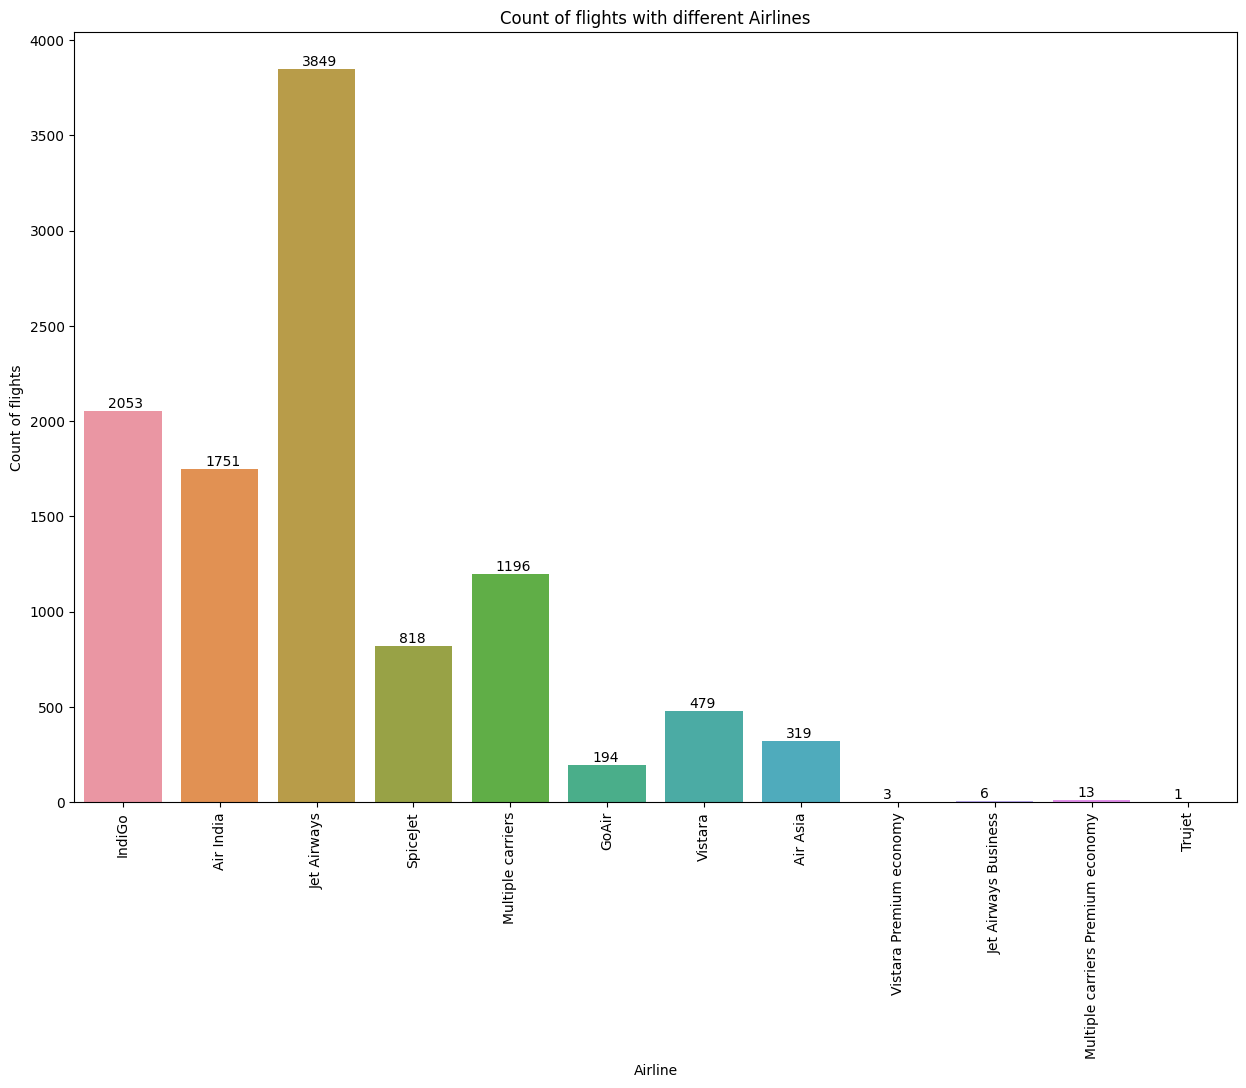

In [221]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

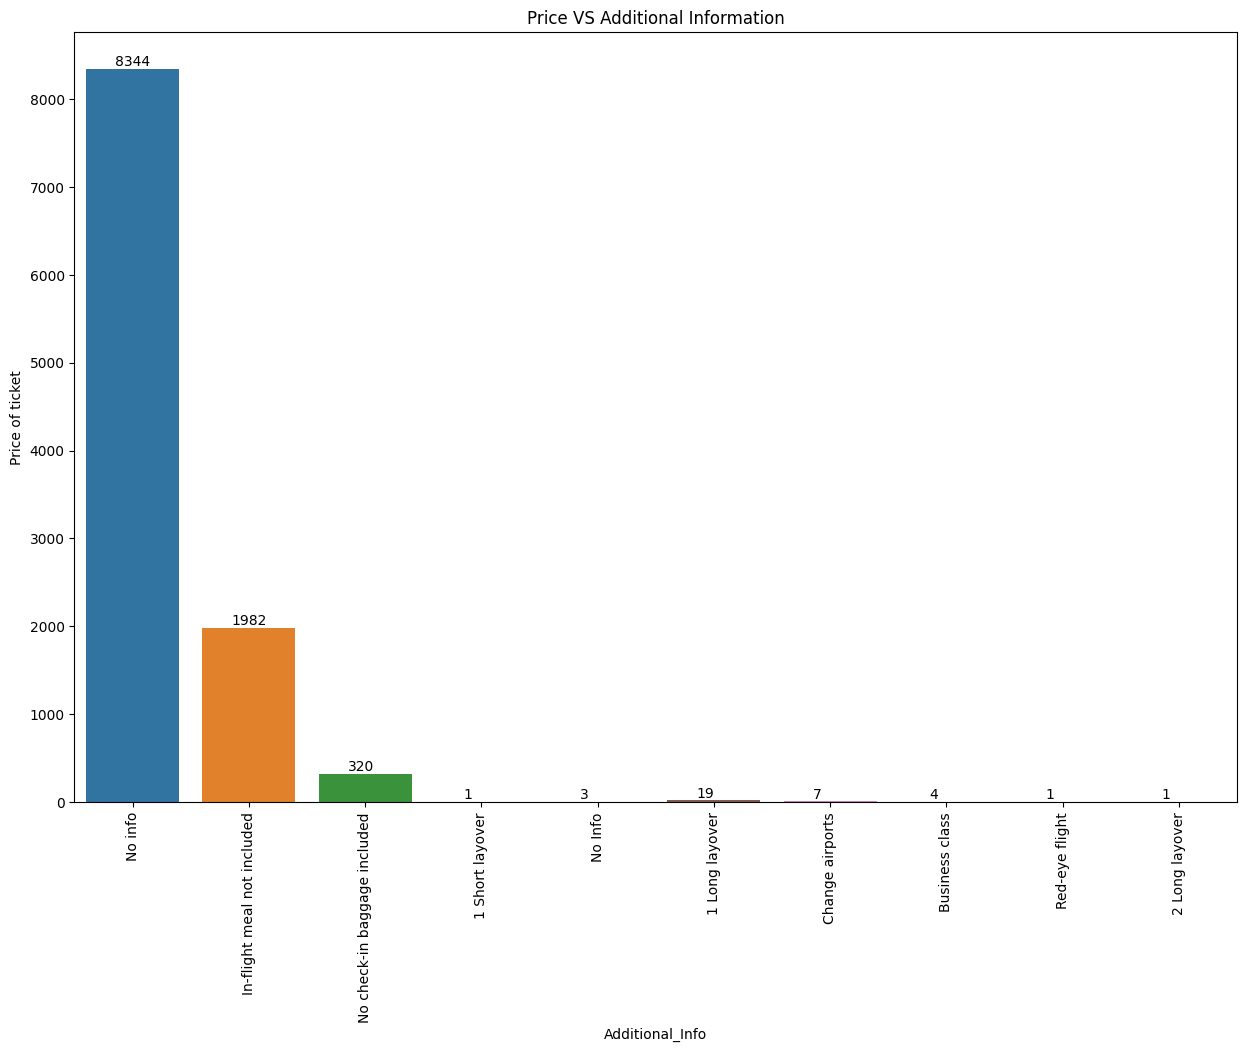

In [222]:


plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
ax=sns.countplot(x = 'Additional_Info', data =df)
plt.xlabel('Additional_Info')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [223]:
drop_col(df,'Duration')

<Axes: xlabel='Total_Stops', ylabel='Price'>

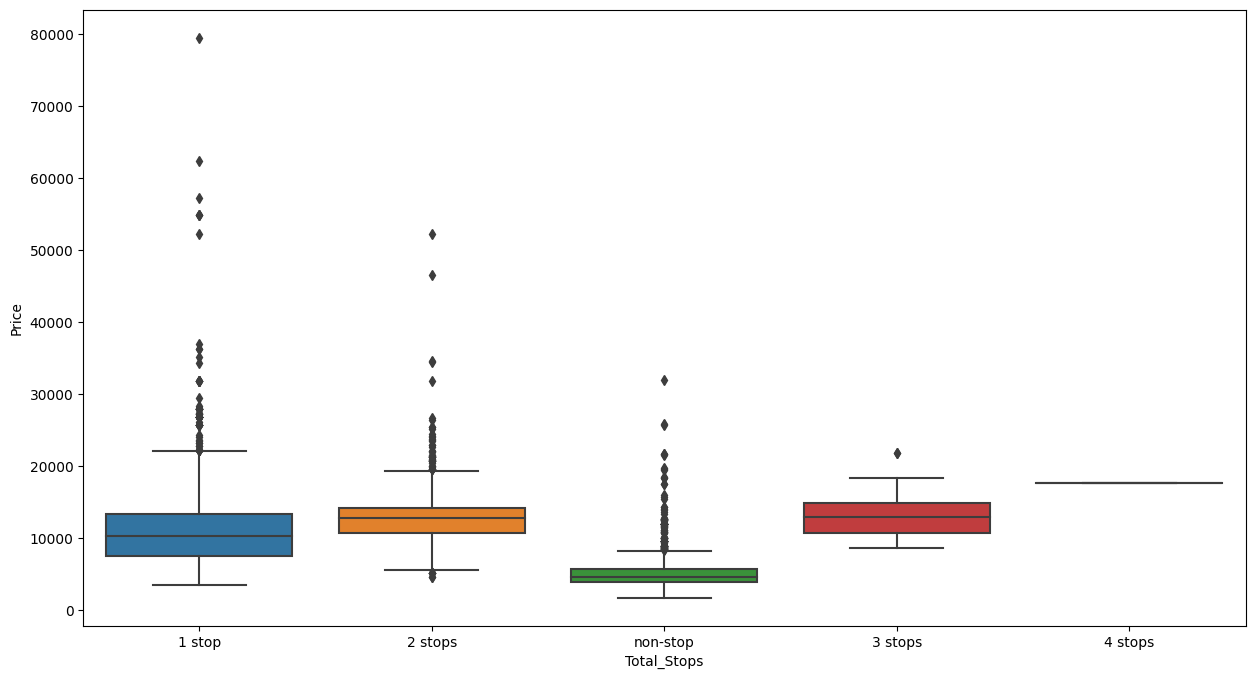

In [224]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Source', ylabel='Price'>

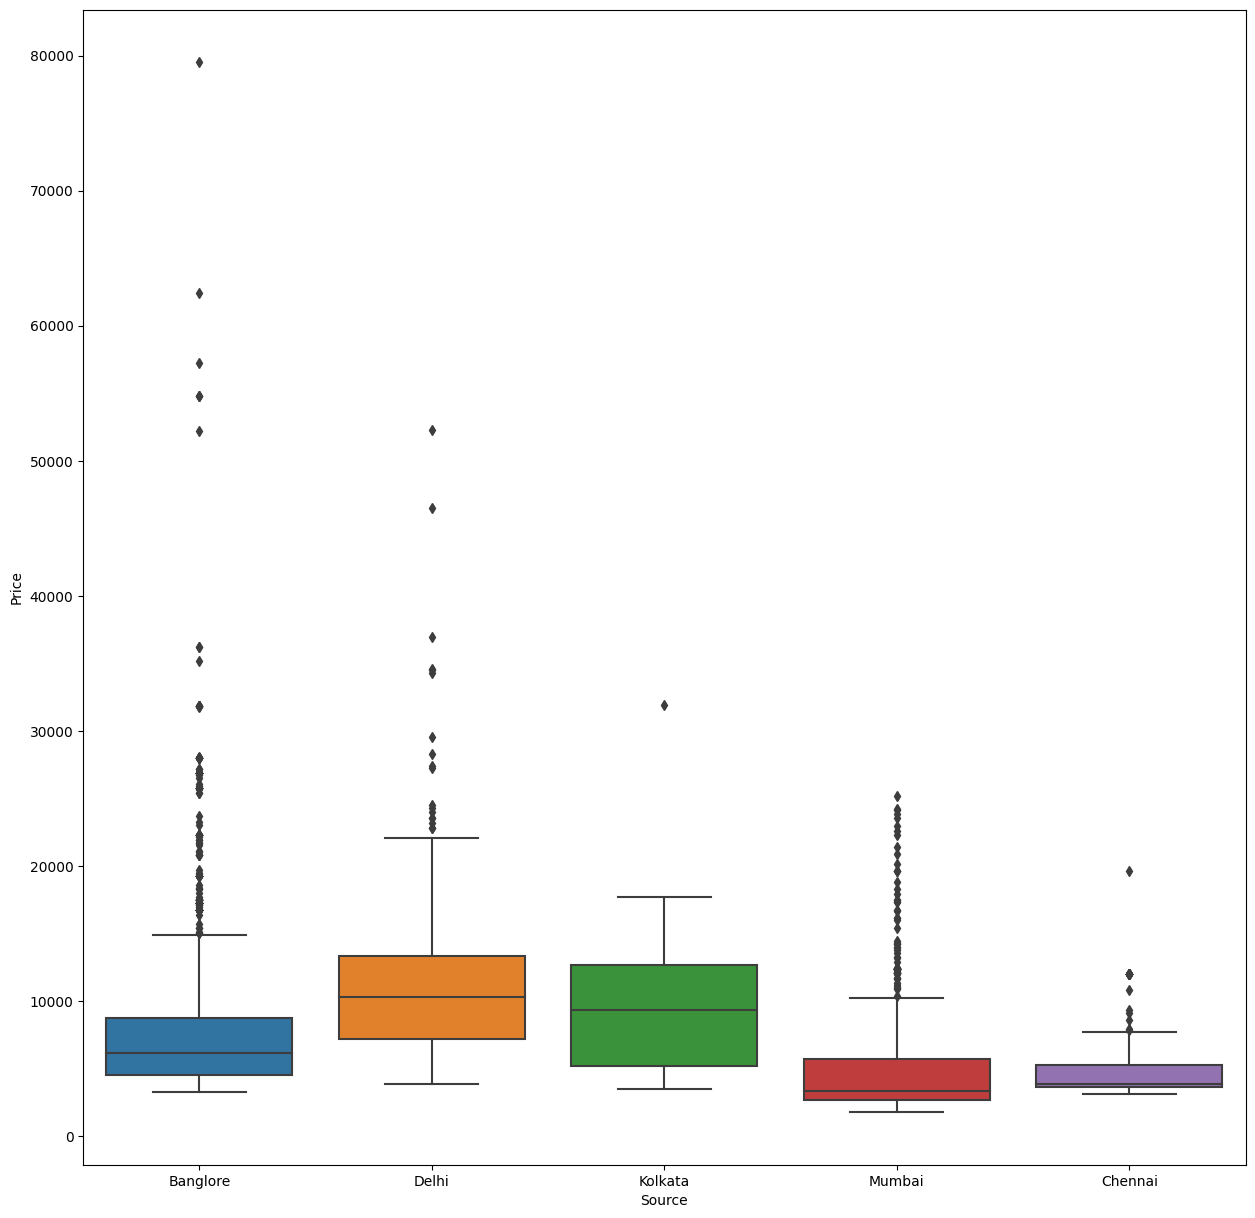

In [225]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='journey_month', ylabel='Price'>

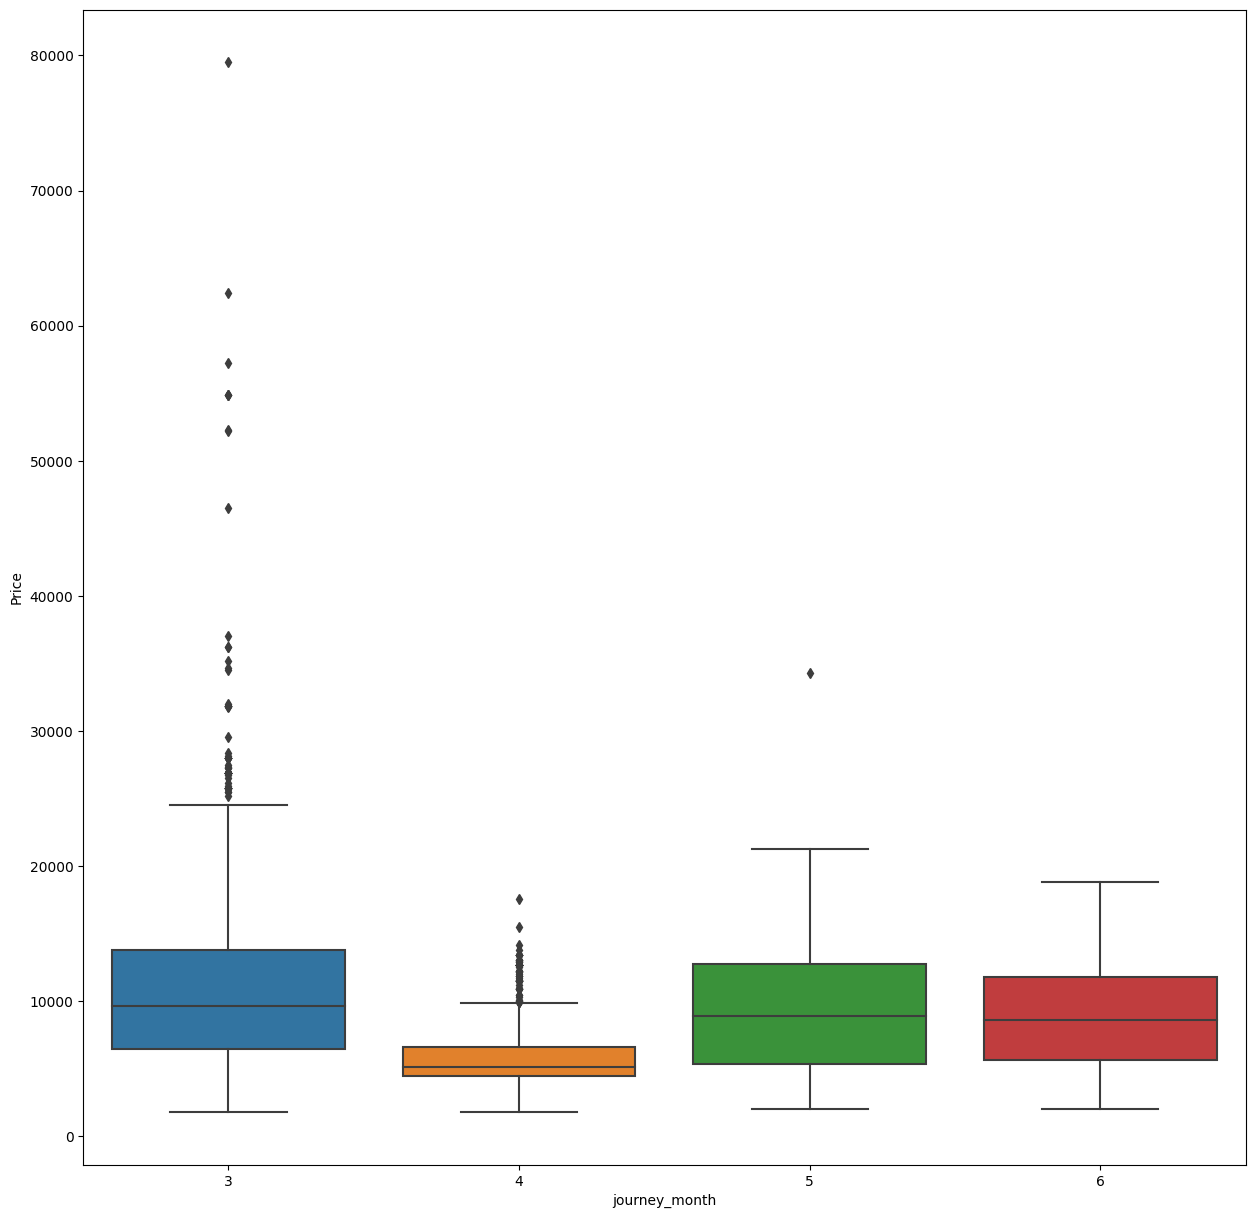

In [226]:
plt.figure(figsize=(15,15))
sns.boxplot(x='journey_month',y='Price',data=df.sort_values('Price',ascending=False))

In [227]:
# plt.figure(figsize = (15, 10))
# plt.title('Price VS Departure Time')
# ax=sns.countplot(x = 'dep_m', data =df)
# plt.xlabel('dep_m')
# plt.ylabel('Price')
# plt.xticks(rotation = 90)
# for p in ax.patches:
#     ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
#                     color= 'black')

<Axes: xlabel='journey_day', ylabel='Price'>

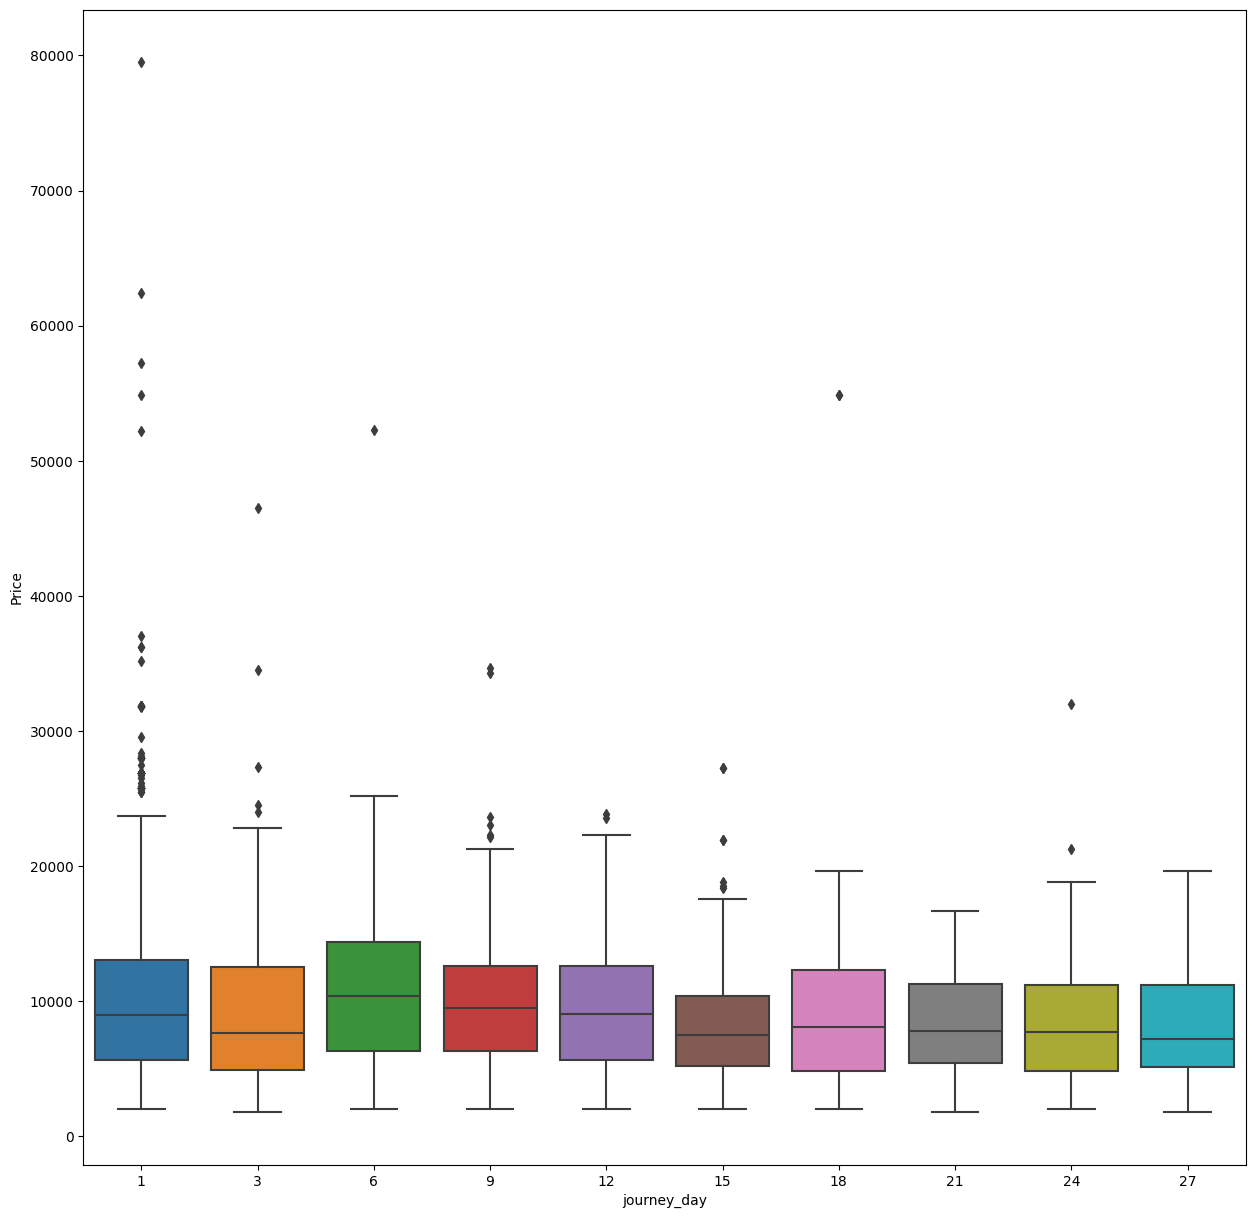

In [228]:
plt.figure(figsize=(15,15))
sns.boxplot(x='journey_day',y='Price',data=df.sort_values('Price',ascending=False))

In [229]:
# df.plot.hexbin(x='duration_m',y='Price',gridsize=15)


In [230]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int32
journey_month         int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
dur_hour             object
dur_min              object
dtype: object

In [231]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [232]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int32
journey_month         int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
dur_hour              int64
dur_min               int64
dtype: object

In [233]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [234]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df.Airline.values)
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,3,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,4,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,3,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,1,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,4,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,10,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [235]:
df['Source'] = le.fit_transform(df.Source.values)

In [236]:
df['Destination'] = le.fit_transform(df.Destination.values)

In [237]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)
# data_corr

In [238]:
duration_h=list(df['dur_hour'])
duration_m=list(df['dur_min'])
for i in range(len(duration_m)):
    duration_m[i]=duration_h[i]*60 + duration_m[i]
df['duration_m']=duration_m

df.drop('dur_hour', axis=1, inplace=True)
df.drop('dur_min', axis=1, inplace=True)

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_m
0,3,0,5,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,1,3,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,4,2,1,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,3,3,0,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,3,0,5,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285


In [239]:
dep_h=list(df['Dep_Time_hour'])
dep_m=list(df['Dep_Time_min'])
for i in range(len(dep_m)):
    dep_m[i]=dep_h[i]*60 + dep_m[i]
df['dep_m']=dep_m

df.drop('Dep_Time_hour', axis=1, inplace=True)
df.drop('Dep_Time_min', axis=1, inplace=True)

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_min,duration_m,dep_m
0,3,0,5,BLR → DEL,non-stop,No info,3897,24,3,1,10,170,1340
1,1,3,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,445,350
2,4,2,1,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,1140,565
3,3,3,0,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,325,1085
4,3,0,5,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,285,1010


In [240]:
arr_h=list(df['Arrival_Time_hour'])
arr_m=list(df['Arrival_Time_min'])
for i in range(len(arr_m)):
    arr_m[i]=arr_h[i]*60 + arr_m[i]
df['arr_m']=arr_m

df.drop('Arrival_Time_min', axis=1, inplace=True)
df.drop('Arrival_Time_hour', axis=1, inplace=True)

df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,duration_m,dep_m,arr_m
0,3,0,5,BLR → DEL,non-stop,No info,3897,24,3,170,1340,70
1,1,3,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,445,350,795
2,4,2,1,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,1140,565,265
3,3,3,0,CCU → NAG → BLR,1 stop,No info,6218,12,5,325,1085,1410
4,3,0,5,BLR → NAG → DEL,1 stop,No info,13302,1,3,285,1010,1295
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,non-stop,No info,4107,9,4,150,1195,1345
10679,1,3,0,CCU → BLR,non-stop,No info,4145,27,4,155,1245,1400
10680,4,0,2,BLR → DEL,non-stop,No info,7229,27,4,180,500,680
10681,10,0,5,BLR → DEL,non-stop,No info,12648,1,3,160,690,850


In [241]:
total_stops=list(df['Total_Stops'])

for i in range(len(total_stops)):
    if(total_stops[i]=='non-stop'):
        total_stops[i]=0
    if(total_stops[i]=='1 stop'):
        total_stops[i]=1
    if(total_stops[i]=='2 stop'):
        total_stops[i]=2
    if(total_stops[i]=='3 stop'):
        total_stops[i]=3
    if(total_stops[i]=='4 stop'):
        total_stops[i]=4
df['tot_stop']=total_stops
df.drop('Total_Stops', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,journey_day,journey_month,duration_m,dep_m,arr_m,tot_stop
0,3,0,5,BLR → DEL,No info,3897,24,3,170,1340,70,0
1,1,3,0,CCU → IXR → BBI → BLR,No info,7662,1,5,445,350,795,2 stops
2,4,2,1,DEL → LKO → BOM → COK,No info,13882,9,6,1140,565,265,2 stops
3,3,3,0,CCU → NAG → BLR,No info,6218,12,5,325,1085,1410,1
4,3,0,5,BLR → NAG → DEL,No info,13302,1,3,285,1010,1295,1


In [242]:
total_stops=list(df['tot_stop'])

for i in range(len(total_stops)):
    if(total_stops[i]==0):
        total_stops[i]=0
    if(total_stops[i]==1):
        total_stops[i]=1
    if(total_stops[i]=='2 stops'):
        total_stops[i]=2
    if(total_stops[i]=='3 stops'):
        total_stops[i]=3
    if(total_stops[i]=='4 stops'):
        total_stops[i]=4
df['stop_count']=total_stops
df.drop('tot_stop', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,BLR → DEL,No info,3897,24,3,170,1340,70,0
1,1,3,0,CCU → IXR → BBI → BLR,No info,7662,1,5,445,350,795,2
2,4,2,1,DEL → LKO → BOM → COK,No info,13882,9,6,1140,565,265,2
3,3,3,0,CCU → NAG → BLR,No info,6218,12,5,325,1085,1410,1
4,3,0,5,BLR → NAG → DEL,No info,13302,1,3,285,1010,1295,1


In [243]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)

# data_corr

In [244]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(16,10))
# import seaborn as sns
# sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
# plt.show()

In [245]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Additional_Info'] = le.fit_transform(df.Additional_Info.values)
df

,Airline,Source,Destination,Route,Additional_Info,Price,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,BLR → DEL,8,3897,24,3,170,1340,70,0
1,1,3,0,CCU → IXR → BBI → BLR,8,7662,1,5,445,350,795,2
2,4,2,1,DEL → LKO → BOM → COK,8,13882,9,6,1140,565,265,2
3,3,3,0,CCU → NAG → BLR,8,6218,12,5,325,1085,1410,1
4,3,0,5,BLR → NAG → DEL,8,13302,1,3,285,1010,1295,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,8,4107,9,4,150,1195,1345,0
10679,1,3,0,CCU → BLR,8,4145,27,4,155,1245,1400,0
10680,4,0,2,BLR → DEL,8,7229,27,4,180,500,680,0
10681,10,0,5,BLR → DEL,8,12648,1,3,160,690,850,0


In [246]:
# add_info=list(df['Additional_Info'])
 
# for i in range(len(add_info)):
#     if(add_info[i]==7):
#         add_info[i]=2
#     if(add_info[i]==8):
#         add_info[i]=1
#     if(add_info[i]==5):
#         add_info[i]=3
# df['add_info']=add_info
# df.drop('Additional_Info', axis=1, inplace=True)

In [247]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)

# data_corr

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

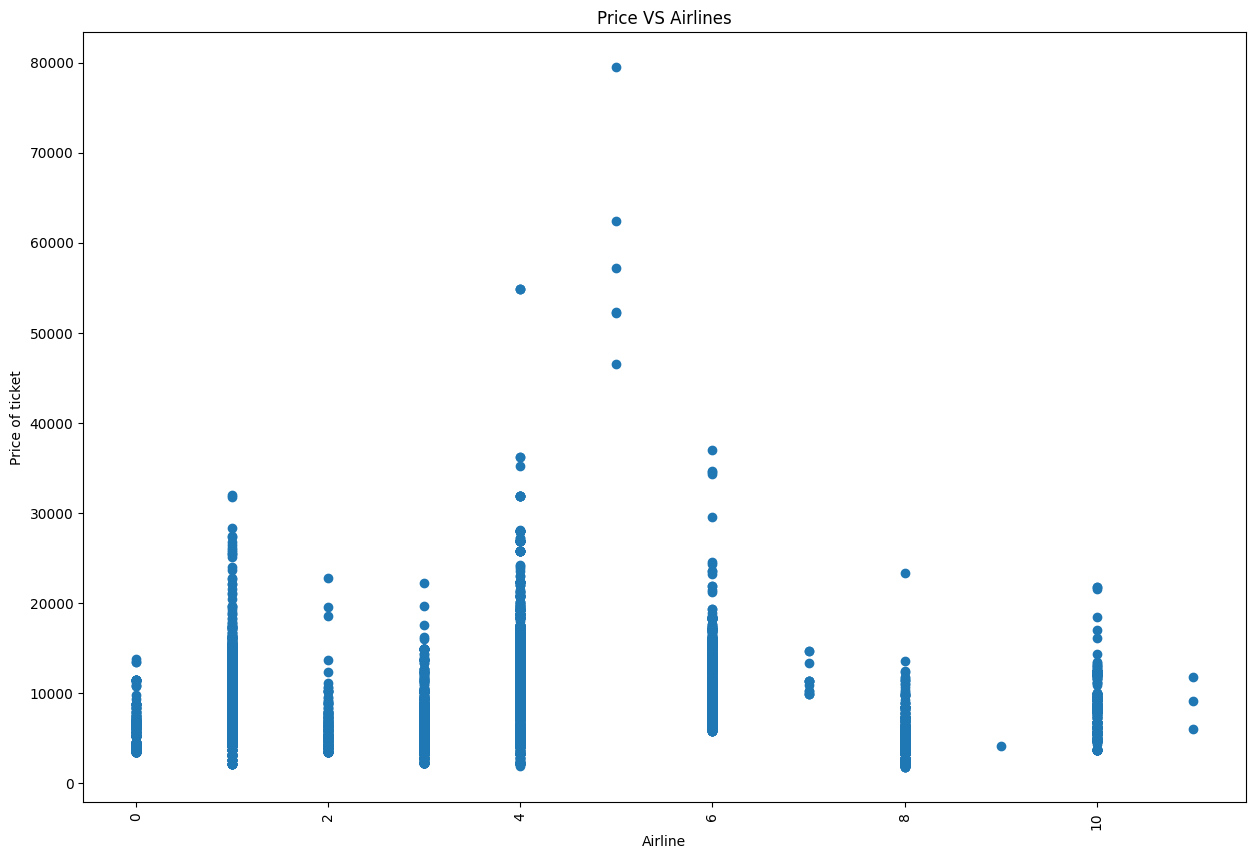

In [248]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [249]:
df['Airline'].value_counts()


Airline
4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: count, dtype: int64

In [250]:
# Airline
df["Airline"].replace({7:2,5:2,11:2,9:2}, inplace=True)

In [251]:
df['Airline'].value_counts()


Airline
4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      217
Name: count, dtype: int64

In [252]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(16,10))
# import seaborn as sns
# sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
# plt.show()

In [253]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)

# data_corr

In [254]:
df["Additional_Info"].value_counts()


Additional_Info
8    8344
5    1982
7     320
0      19
4       7
3       4
6       3
1       1
9       1
2       1
Name: count, dtype: int64

In [255]:
# Additional_Info
df["Additional_Info"].replace({2:0,9:0,1:0,6:0,3:0,4:0}, inplace=True)

In [256]:
df["Additional_Info"].value_counts()


Additional_Info
8    8344
5    1982
7     320
0      36
Name: count, dtype: int64

In [257]:
df["Additional_Info"].replace({0:7}, inplace=True)

In [258]:
df["Additional_Info"].value_counts()


Additional_Info
8    8344
5    1982
7     356
Name: count, dtype: int64

In [259]:
# add_info=list(df['Additional_Info'])
 
# for i in range(len(add_info)):
#     if(add_info[i]==7):
#         add_info[i]=2
#     if(add_info[i]==8):
#         add_info[i]=1
#     if(add_info[i]==5):
#         add_info[i]=3
# df['add_info']=add_info
# df.drop('Additional_Info', axis=1, inplace=True)

In [260]:
# df["Additional_Info"].value_counts()


In [261]:
# data_corr = df.corr()['Price'].sort_values(ascending=False)

# data_corr

In [262]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Additional_Info'] = le.fit_transform(df.Additional_Info.values)
df

,Airline,Source,Destination,Route,Additional_Info,Price,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,BLR → DEL,2,3897,24,3,170,1340,70,0
1,1,3,0,CCU → IXR → BBI → BLR,2,7662,1,5,445,350,795,2
2,4,2,1,DEL → LKO → BOM → COK,2,13882,9,6,1140,565,265,2
3,3,3,0,CCU → NAG → BLR,2,6218,12,5,325,1085,1410,1
4,3,0,5,BLR → NAG → DEL,2,13302,1,3,285,1010,1295,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,2,4107,9,4,150,1195,1345,0
10679,1,3,0,CCU → BLR,2,4145,27,4,155,1245,1400,0
10680,4,0,2,BLR → DEL,2,7229,27,4,180,500,680,0
10681,10,0,5,BLR → DEL,2,12648,1,3,160,690,850,0


In [263]:
# add_info=list(df['Additional_Info'])
 
# for i in range(len(add_info)):
#     if(add_info[i]==7):
#         add_info[i]=2
#     if(add_info[i]==8):
#         add_info[i]=1
#     if(add_info[i]==5):
#         add_info[i]=3
# df['add_info']=add_info
# df.drop('Additional_Info', axis=1, inplace=True)

In [264]:
# df["Additional_Info"].value_counts()

In [265]:
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,BLR → DEL,2,3897,24,3,170,1340,70,0
1,1,3,0,CCU → IXR → BBI → BLR,2,7662,1,5,445,350,795,2
2,4,2,1,DEL → LKO → BOM → COK,2,13882,9,6,1140,565,265,2
3,3,3,0,CCU → NAG → BLR,2,6218,12,5,325,1085,1410,1
4,3,0,5,BLR → NAG → DEL,2,13302,1,3,285,1010,1295,1


In [266]:
df.drop('Route', axis=1, inplace=True)

In [267]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,2,3897,24,3,170,1340,70,0
1,1,3,0,2,7662,1,5,445,350,795,2
2,4,2,1,2,13882,9,6,1140,565,265,2
3,3,3,0,2,6218,12,5,325,1085,1410,1
4,3,0,5,2,13302,1,3,285,1010,1295,1


In [268]:
# Let's Analyze Destination Column also
df['Destination'].value_counts()

Destination
1    4536
0    2871
2    1265
5     932
3     697
4     381
Name: count, dtype: int64

In [269]:
X,Y = df.iloc[:,1:].values, df.iloc[0,0:].values
X,Y

(array([[   0,    5,    2, ..., 1340,   70,    0],
        [   3,    0,    2, ...,  350,  795,    2],
        [   2,    1,    2, ...,  565,  265,    2],
        ...,
        [   0,    2,    2, ...,  500,  680,    0],
        [   0,    5,    2, ...,  690,  850,    0],
        [   2,    1,    2, ...,  655, 1155,    2]]),
 array([   3,    0,    5,    2, 3897,   24,    3,  170, 1340,   70,    0]))

In [270]:
X,Y

(array([[   0,    5,    2, ..., 1340,   70,    0],
        [   3,    0,    2, ...,  350,  795,    2],
        [   2,    1,    2, ...,  565,  265,    2],
        ...,
        [   0,    2,    2, ...,  500,  680,    0],
        [   0,    5,    2, ...,  690,  850,    0],
        [   2,    1,    2, ...,  655, 1155,    2]]),
 array([   3,    0,    5,    2, 3897,   24,    3,  170, 1340,   70,    0]))

In [271]:
Y

array([   3,    0,    5,    2, 3897,   24,    3,  170, 1340,   70,    0])

In [272]:
X=df.drop('Price',axis=1)
Y=df['Price']

In [273]:
data_corr = df.corr()['Price'].sort_values(ascending=False)

data_corr

Price              1.000000
stop_count         0.603897
duration_m         0.506480
arr_m              0.020901
Source             0.015999
dep_m              0.005468
Additional_Info   -0.008024
Airline           -0.048287
Destination       -0.071122
journey_month     -0.103643
journey_day       -0.153774
Name: Price, dtype: float64

In [274]:
# import matplotlib .pyplot as plt
# import seaborn as sns

In [275]:
# plt.show()

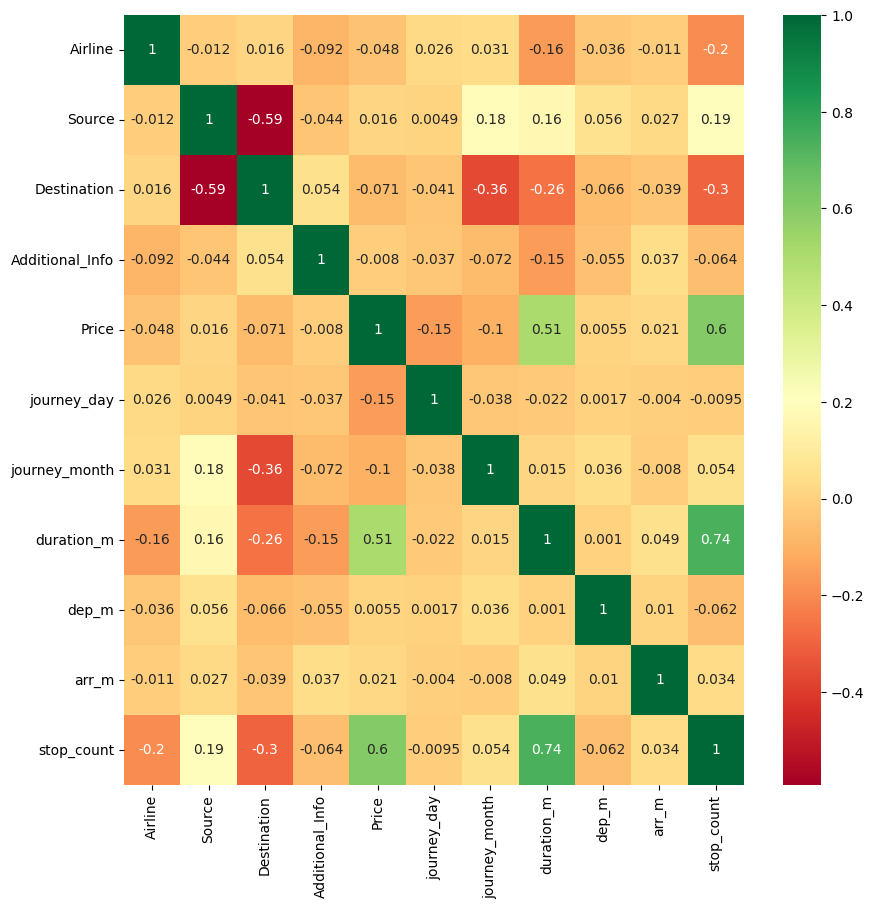

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [277]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Assuming X is your feature matrix and y is your target variable
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Create a RandomForestClassifier instance
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model
# rf_classifier.fit(X_train, y_train)

# # Make predictions
# y_pred = rf_classifier.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")



In [278]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [279]:
# # from sklearn.metrics import accuracy_score
# # Create a RandomForestClassifier instance
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model
# rf_classifier.fit(X_train, Y_train)

# # Make predictions
# y_pred = rf_classifier.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(Y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [280]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,Y_train)
    print("Training score: {}".format(model.score(X_train,Y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(Y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(Y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(Y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(Y_test,predictions))))
     
    sns.distplot(Y_test-predictions)      
          

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9793518538317818
Predictions are: [14467.05  5932.1   3681.13 ...  4984.62 14178.02  6906.39]


r2 score is: 0.8387734984083872
MAE:753.5514616040658
MSE:3480874.6848534974
RMSE:1865.7102360370695


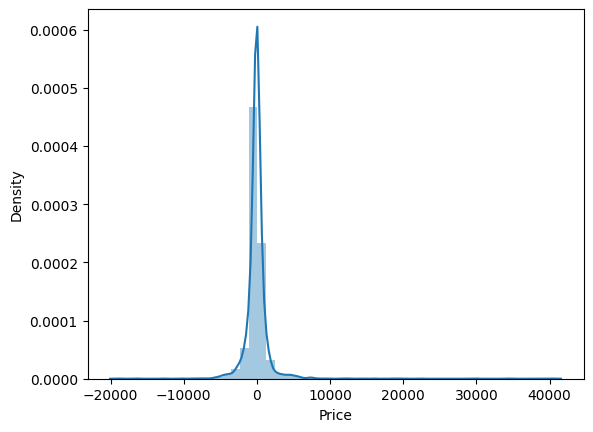

In [282]:

predict(RandomForestRegressor())


Model is: DecisionTreeClassifier()
Training score: 0.9830145780393206
Predictions are: [14781  5636  3597 ...  5170 13941  8238]


r2 score is: 0.7266728919725209
MAE:906.8383775351014
MSE:5901122.964430577
RMSE:2429.22270786986


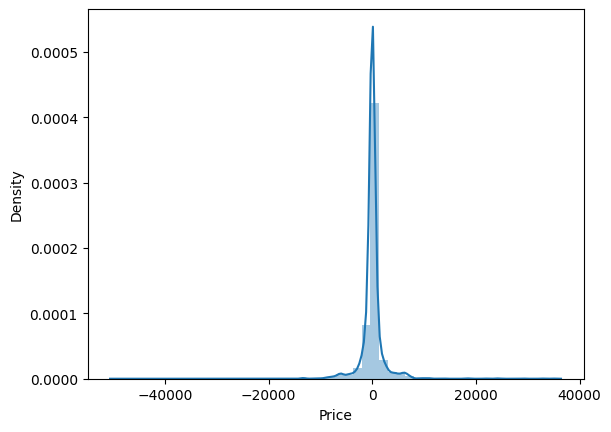

In [283]:
from sklearn.tree import DecisionTreeClassifier as DTC
predict(DTC())



In [284]:
from sklearn.linear_model import LogisticRegressionCV as LR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB



Model is: RandomForestClassifier()
Training score: 0.9830145780393206
Predictions are: [14781  5636  3597 ...  4565 13941  8238]


r2 score is: 0.74909763194467
MAE:851.203120124805
MSE:5416973.591263651
RMSE:2327.439277674855


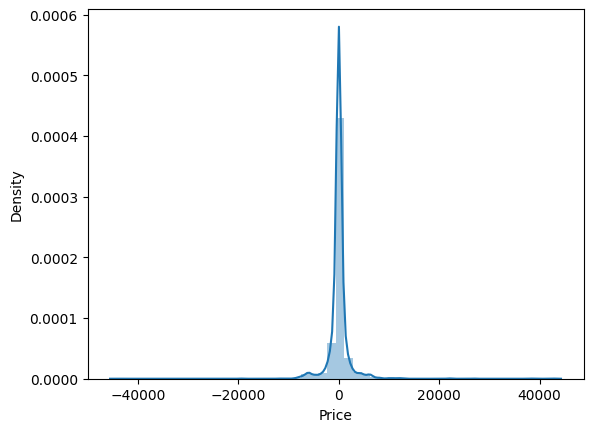

In [285]:
predict(RandomForestClassifier())

In [286]:
from xgboost import XGBRegressor


In [287]:
# xgb = XGBRegressor()
# xgb.fit(x_train,y_train)

# #The predicted data
# xgb_pred = xgb.predict(x_test)

# #The performance
# performance(xgb,x_train,y_train,xgb_pred,y_test)

Model is: GaussianNB()
Training score: 0.5960946903838438
Predictions are: [14781  6794  3597 ...  4565 14388  5775]


r2 score is: 0.6829987152524494
MAE:1157.148205928237
MSE:6844046.954134165
RMSE:2616.112947510899


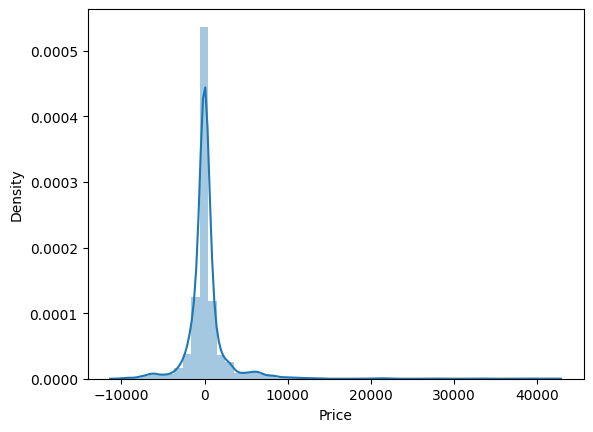

In [288]:
predict(GaussianNB())

Model is: LogisticRegression()
Training score: 0.05764343988230574
Predictions are: [14781 10844  4823 ...  7229 10262  3943]


r2 score is: 0.13323633974784654
MAE:3050.7485179407176
MSE:18713397.93978159
RMSE:4325.898512422777


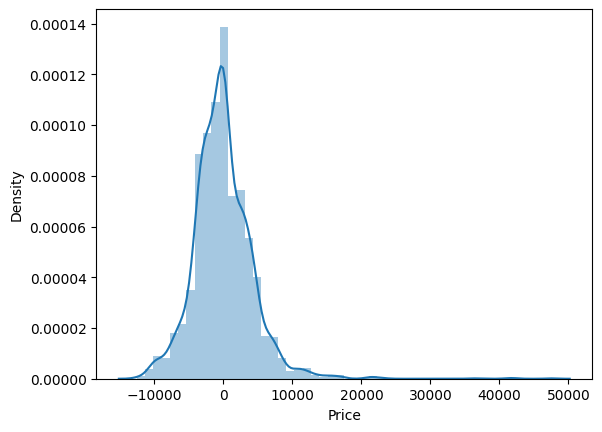

In [289]:
predict(LogisticRegression())


Model is: KNeighborsRegressor()
Training score: 0.7093604222635866
Predictions are: [13762.6  6164.8  8564.2 ...  5225.4 10523.4  6718.4]


r2 score is: 0.5406558715177181
MAE:1807.47631825273
MSE:9917224.108230889
RMSE:3149.1624455132333


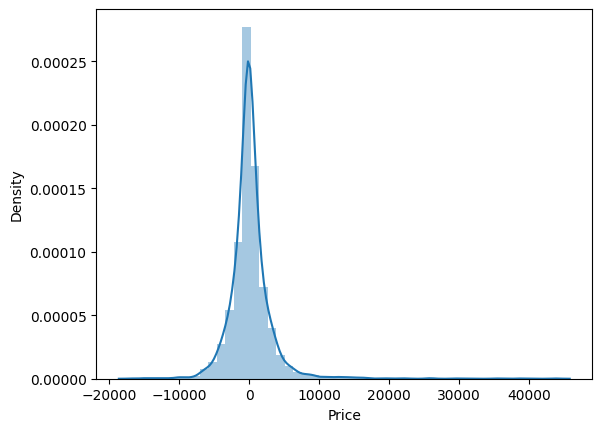

In [290]:
predict(KNeighborsRegressor())


Model is: DecisionTreeRegressor()
Training score: 0.9960992299329943
Predictions are: [13941.  5636.  3597. ...  4565. 14914.  6628.]


r2 score is: 0.728178949513208
MAE:839.8877275091005
MSE:5868607.233359335
RMSE:2422.520842708961


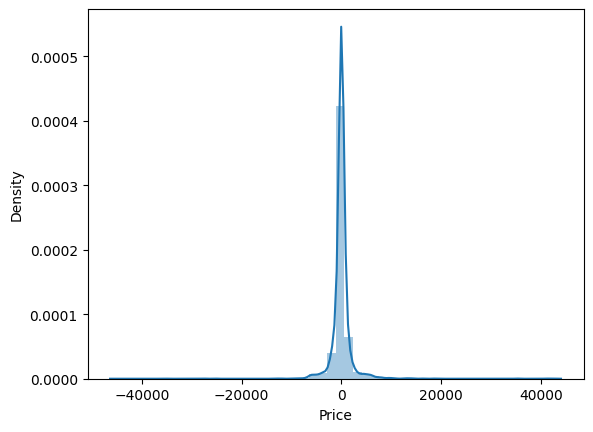

In [291]:
predict(DecisionTreeRegressor())


In [292]:
# from sklearn.model_selection import cross_validate, GridSearchCV

# model = XGBRegressor(objective='count:poisson')

# param = {'n_estimators' : [500, 700, 1000], 'learning_rate' : [0.1,0.2,0.3],'max_depth' : [5,6,7,8]}

# grid_search = GridSearchCV(estimator = model, param_grid=param, cv = 5)
# grid_search.fit(x_train, y_train)

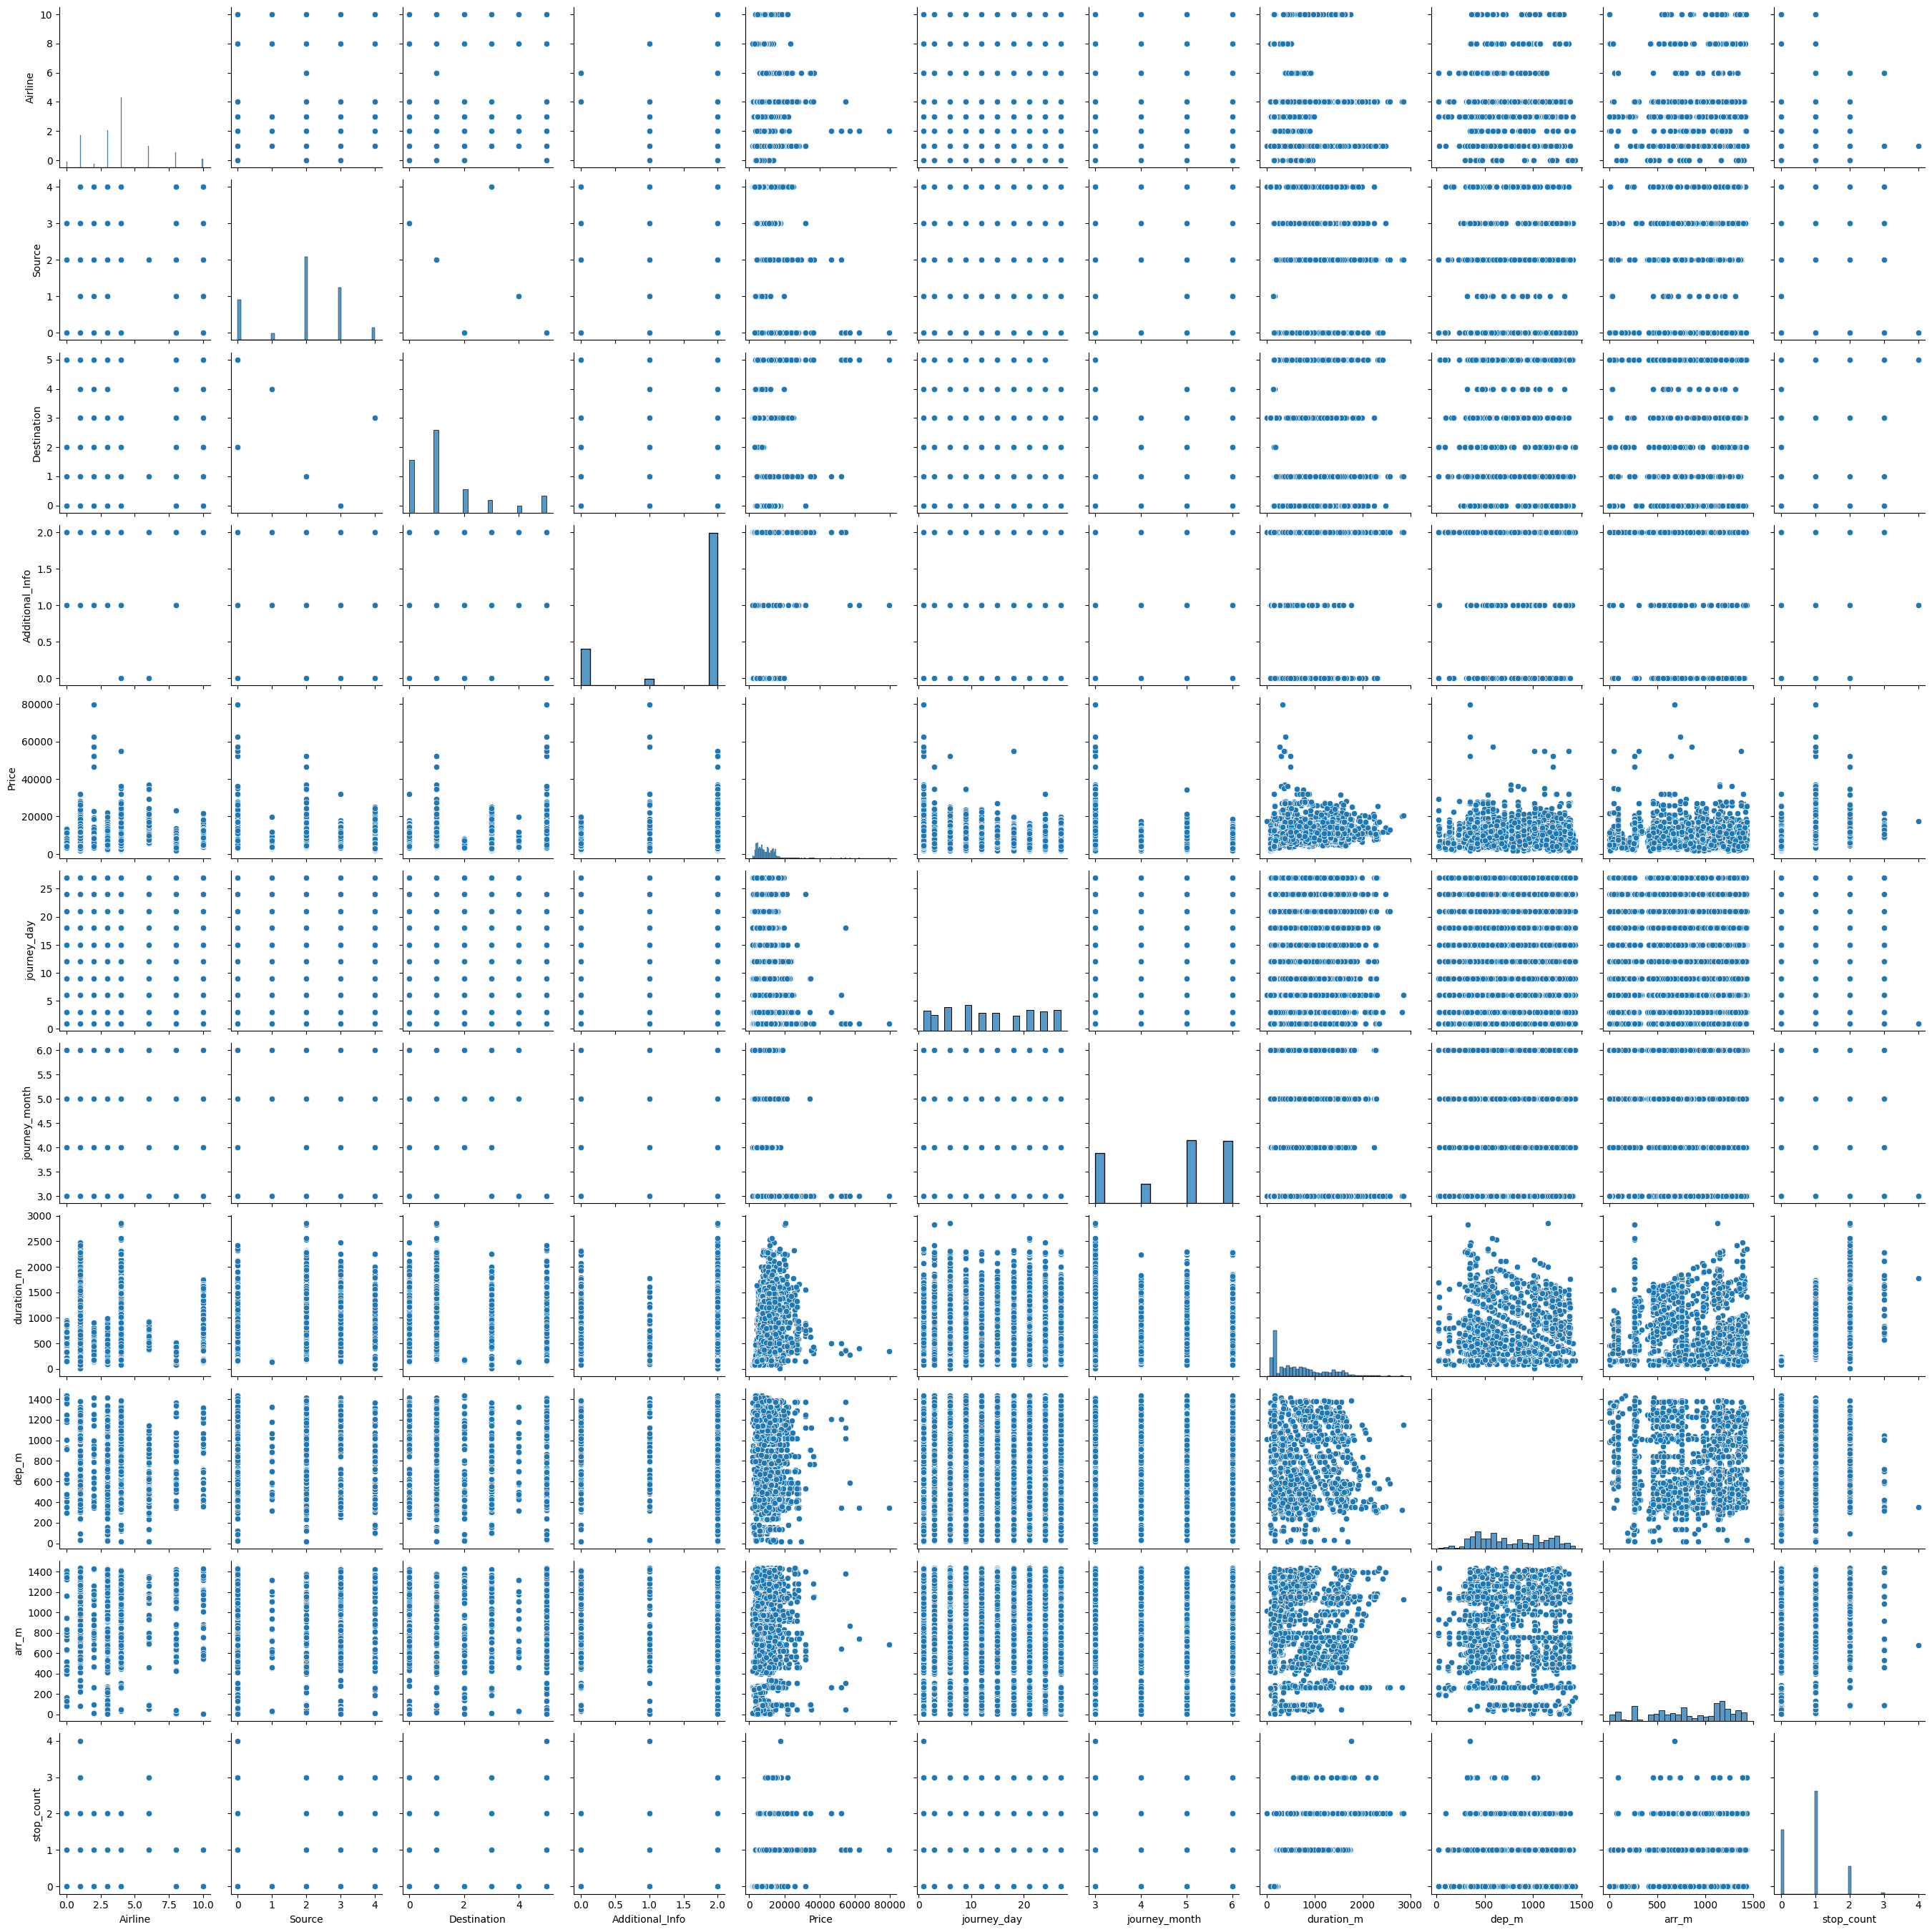

In [293]:
sns.pairplot(df)

In [294]:
df.groupby('Airline')[['Price']].describe()

Price                                                               \
          count          mean          std     min     25%      50%      75%   
Airline                                                                        
0         319.0   5590.260188  2027.362290  3383.0  4282.0   5162.0   6451.0   
1        1751.0   9612.427756  3901.734561  2050.0  6891.0   9443.0  12219.0   
2         217.0   7680.502304  9228.270442  3398.0  4106.0   5281.0   7646.0   
3        2053.0   5673.682903  2264.142168  2227.0  4226.0   5000.0   6494.0   
4        3849.0  11643.923357  4258.940578  1840.0  9134.0  11467.0  14151.0   
6        1196.0  10902.678094  3721.234997  5797.0  7723.0  10197.0  13587.0   
8         818.0   4338.284841  1849.922514  1759.0  3574.5   3873.0   4760.0   
10        479.0   7796.348643  2914.298578  3687.0  5403.0   7980.0   9345.0   

                  
             max  
Airline           
0        13774.0  
1        31945.0  
2        79512.0  
3        22153.0  
4        54826.0  
6        36983.0  
8        23267.0  
10       21730.0

In [295]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
#3 hidden layer with 8 nodes
#activation is for actiovation function - here we mention what activation function we want to use
#solver is an optimizaer - use solver function to optimize weight and bias
#max_iter is for number of epocks
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)

In [296]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 9, 3, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [297]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test,Y_pred))

0.17753510140405615


In [298]:
import keras

In [299]:
from keras.models import Sequential
from keras.layers import Dense 
import numpy as np
np.random.seed(7) #random seed for reproducibility 

In [300]:
print('Trainig set score',mlp.score(X_train,Y_train))
print('Test set score',mlp.score(X_test,Y_test))

Trainig set score 0.24715795104988633
Test set score 0.17753510140405615


In [301]:
df.head()


,Airline,Source,Destination,Additional_Info,Price,journey_day,journey_month,duration_m,dep_m,arr_m,stop_count
0,3,0,5,2,3897,24,3,170,1340,70,0
1,1,3,0,2,7662,1,5,445,350,795,2
2,4,2,1,2,13882,9,6,1140,565,265,2
3,3,3,0,2,6218,12,5,325,1085,1410,1
4,3,0,5,2,13302,1,3,285,1010,1295,1


In [302]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

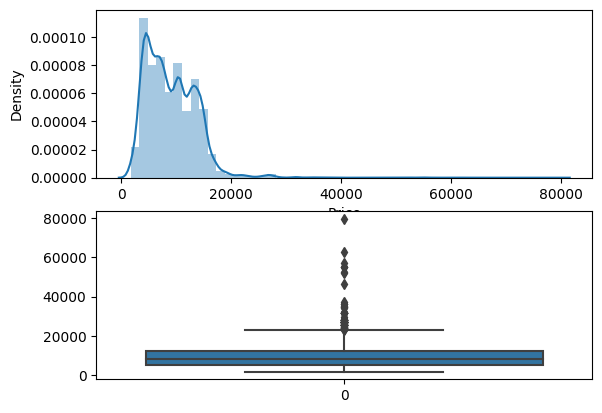

In [303]:
plot(df,'Price')

In [304]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

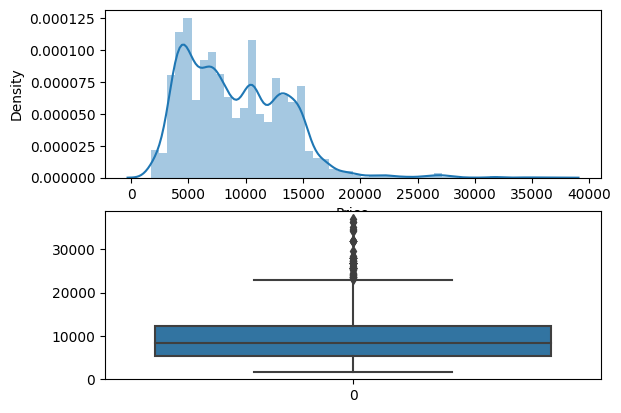

In [305]:
plot(df,'Price')


Model is: DecisionTreeRegressor()
Training score: 0.9960992299329943
Predictions are: [13941.  5636.  3597. ...  4565. 14914.  6628.]


r2 score is: 0.708766575163342
MAE:857.7896515860635
MSE:6287719.735214075
RMSE:2507.532599033176


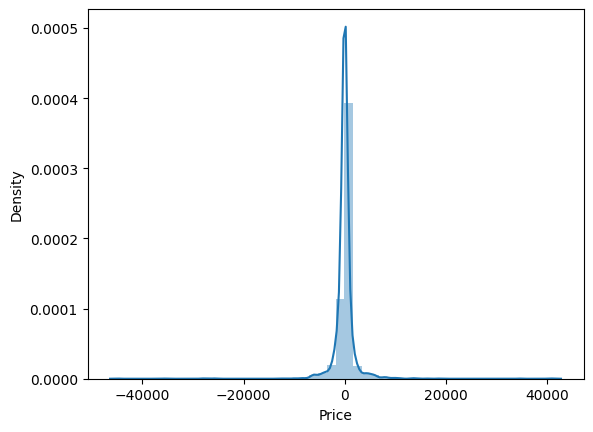

In [306]:
predict(DecisionTreeRegressor())


In [307]:
from sklearn.model_selection import RandomizedSearchCV


In [308]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [309]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,Y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'n_estimators': 220, 'max_features': 'sqrt', 'max_depth': 15}

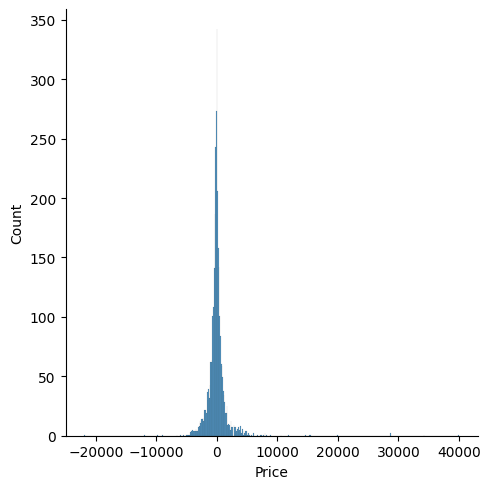

In [310]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(Y_test-prediction)

In [311]:
from keras.models import Sequential
from keras.layers import Dense 
import numpy as np
np.random.seed(7) #random seed for reproducibility 

In [312]:
X.shape,Y.shape,X.head()

((10682, 10),
 (10682,),
    Airline  Source  Destination  Additional_Info  journey_day  journey_month  \
 0        3       0            5                2           24              3   
 1        1       3            0                2            1              5   
 2        4       2            1                2            9              6   
 3        3       3            0                2           12              5   
 4        3       0            5                2            1              3   
 
    duration_m  dep_m  arr_m  stop_count  
 0         170   1340     70           0  
 1         445    350    795           2  
 2        1140    565    265           2  
 3         325   1085   1410           1  
 4         285   1010   1295           1  )

In [313]:
import tensorflow as tf

In [314]:
tf.reshape(Y,[10682,1])

<tf.Tensor: shape=(10682, 1), dtype=int64, numpy=
array([[ 3897],
       [ 7662],
       [13882],
       ...,
       [ 7229],
       [12648],
       [11753]])>

In [315]:
Y.shape

(10682,)

In [316]:
# create Model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])


model.fit(X, Y, epochs=150, batch_size=10,verbose=2)


scores = model.evaluate(X,Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/150


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 10)


In [ ]:
df

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

In [ ]:
df.groupby('dep_m')[['Price']].min().plot(kind='line')


In [ ]:
df.groupby('dep_m')[['Price']].describe()


In [ ]:
sns.barplot(data=df,x='dep_m',y='Price',estimator=np.median)
plt.title("Departure Time")
plt.ylabel("Price of flight")
plt.xlabel(None)
plt.show()

In [ ]:
sns.barplot(data=df,x='arr_m',y='Price',estimator=np.median)
plt.title("Arrival Time")
plt.ylabel("Price of flight")
plt.xlabel(None)
plt.show()

[CV] END ..max_depth=10, max_features=auto, n_estimators=120; total time=   1.9s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=20, max_features=auto, n_estimators=120; total time=   2.5s
[CV] END ..max_depth=20, max_features=auto, n_estimators=120; total time=   2.5s
[CV] END ..max_depth=15, max_features=auto, n_estimators=220; total time=   4.4s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   1.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=120; total time=   1.9s
[CV] END ..max_depth=10, max_features=auto, n_estimators=180; total time=   2.8s
[CV] END ..max_depth=15, max_features=auto, n_estimators=180; total time=   3.6s
[CV] END ..max_depth=15, max_features=auto, n_estimators=220; total time=   4.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=150; total time=   1.1s
[CV] END ...max_depth=5, max

###### 